In [38]:
def LUdecomp3(c,d,e):
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    return c,d,e 

In [39]:
def LUsolve3(c,d,e,b):
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    return b  

In [40]:
import numpy

def curvatures(xData,yData):
    n = len(xData) - 1
    c = numpy.zeros(n)
    d = numpy.ones(n+1)
    e = numpy.zeros(n)
    k = numpy.zeros(n+1)
    c[0:n-1] = xData[0:n-1] - xData[1:n]
    d[1:n] = 2.0*(xData[0:n-1] - xData[2:n+1])
    e[1:n] = xData[1:n] - xData[2:n+1]
    k[1:n] =6.0*(yData[0:n-1] - yData[1:n]) \
                 /(xData[0:n-1] - xData[1:n]) \
             -6.0*(yData[1:n] - yData[2:n+1])   \
                 /(xData[1:n] - xData[2:n+1])
    LUdecomp3(c,d,e)
    LUsolve3(c,d,e,k)
    return k

In [41]:
def evalSpline(xData,yData,x):
    k = curvatures(xData, yData)
    
    def findSegment(xData,x):
        iLeft = 0
        iRight = len(xData)- 1
        while 1:
            if (iRight-iLeft) <= 1: return iLeft
            i =(iLeft + iRight)//2
            if x < xData[i]: iRight = i
            else: iLeft = i
    
    i = findSegment(xData,x)
    h = xData[i] - xData[i+1]
    y = ((x - xData[i+1])**3/h - (x - xData[i+1])*h)*k[i]/6.0 \
      - ((x - xData[i])**3/h - (x - xData[i])*h)*k[i+1]/6.0   \
      + (yData[i]*(x - xData[i+1])                            \
       - yData[i+1]*(x - xData[i]))/h
    return y

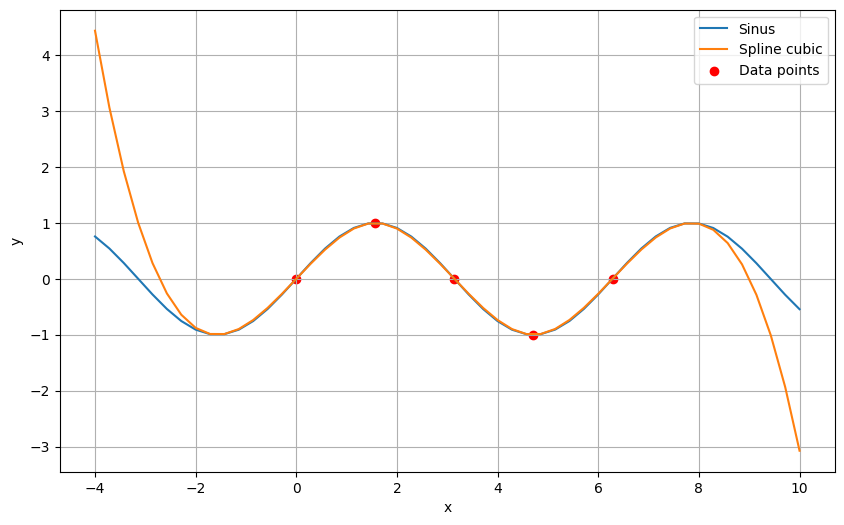

In [42]:
import numpy
from math import pi
from math import sin
from numpy.typing import NDArray
import matplotlib.pyplot as plt

x_data: NDArray = numpy.array([0, pi/2, pi, (3*pi)/2, 2*pi], dtype=float)
y_data: NDArray = numpy.array([0, 1, 0, -1, 0])

# val_range = numpy.linspace(0, 2*pi)
val_range = numpy.linspace(-4, 10)

sinus_vals = [sin(x) for x in val_range]
spline_liniar_vals = [evalSpline(x_data, y_data, x) for x in val_range]

plt.figure(figsize=(10, 6))

plt.plot(val_range, sinus_vals, label='Sinus')
plt.plot(val_range, spline_liniar_vals, label='Spline cubic')
plt.scatter(x_data, y_data, color='red', label='Data points')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)
plt.show()